### Importing Libraries and Data

In [1]:
import nltk
#nltk.download()


In [2]:
import pandas as pd
dataNlp = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['label','body_text'], header=None)
dataNlp.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
dataNlp['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

### Preprocessing Data

In [4]:
### Q1. Preprocess the data so that stopwords are removed
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopword = nltk.corpus.stopwords.words('english')
import string
import re
from nltk.tokenize import word_tokenize
wnl = nltk.WordNetLemmatizer()

def processData(txt):
    dataNlp['noPunct'] = txt.apply(lambda x: "".join([char.lower() for char in x if char not in string.punctuation]))
    #dataNlp['tokenized'] = dataNlp.noPunct.apply(lambda x: re.split('\W+', x))
    dataNlp['tokenized'] = dataNlp.noPunct.apply(lambda x: word_tokenize(x))
    dataNlp['noStopwords'] = dataNlp.tokenized.apply(lambda x: [word for word in x if word not in stopword])
    dataNlp['lemmatized'] = dataNlp.noStopwords.apply(lambda x: [wnl.lemmatize(word) for word in x])
    return dataNlp.lemmatized
    
processData(dataNlp.body_text)
dataNlp['body_len'] = dataNlp['body_text'].apply(lambda x: len(x) - x.count(" "))
dataNlp.head()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,label,body_text,noPunct,tokenized,noStopwords,lemmatized,body_len
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...",160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",49
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",28


In [5]:
### Q2. Write down a function that can count percentage of punctuation marks in the text

def countPunct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

dataNlp['punct%'] = dataNlp.body_text.apply(lambda x: countPunct(x))
dataNlp.head()

,label,body_text,noPunct,tokenized,noStopwords,lemmatized,body_len,punct%
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",49,4.1
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",28,7.1


In [6]:
cleanNlp = dataNlp[['label','body_text','body_len','punct%']]
cleanNlp.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Split into train/test

In [7]:
## Q3. For the test and train datasets create a TfIdfVectorizer
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    #noStop = [word for word in tokens if word not in stopword]
    #lem = [wnl.lemmatize(word) for word in noStop]
    lem = [ps.stem(word) for word in tokens if word not in stopword]
    return lem

from sklearn.feature_extraction.text import TfidfVectorizer
tfVect = TfidfVectorizer(analyzer=clean_text)
xtfTrain = tfVect.fit_transform(cleanNlp.body_text)
#xtfTest = tfVect.fit_transform(X_test)
X = pd.DataFrame(xtfTrain.toarray(), columns = tfVect.get_feature_names())

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335215,0.0,0.0
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [8]:
finalNlp=pd.concat([cleanNlp[['label','body_len','punct%']], X], axis=1)

,label,body_len,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,ham,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,spam,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,ham,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,ham,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,ham,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,spam,131,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5564,ham,29,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335215,0.0,0.0
5565,ham,48,14.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,ham,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [9]:
### Q4. Split the whole data set into training and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finalNlp.drop(['label'],axis=1), finalNlp.label, test_size=0.2, random_state=0) 

In [12]:
## Q5. Create a Ensemble classifier that can predict if the given Text is a Spam or a Ham 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [10, 100, 150],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search

In [13]:
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,9.309112,0.253459,0.284960,0.023554,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.967489,0.976457,0.976404,0.973034,0.975281,0.973731,0.003361,1
7,7.624628,0.298867,0.242668,0.016967,90,100,"{'max_depth': 90, 'n_estimators': 100}",0.970852,0.977578,0.976404,0.973034,0.969663,0.973507,0.003067,2
11,11.092117,0.329920,0.293479,0.007354,None,150,"{'max_depth': None, 'n_estimators': 150}",0.969731,0.978700,0.976404,0.973034,0.969663,0.973507,0.003596,2
8,10.471545,0.446929,0.275427,0.005430,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.966368,0.975336,0.979775,0.974157,0.969663,0.973058,0.004644,4
4,6.642742,0.137116,0.256767,0.016861,60,100,"{'max_depth': 60, 'n_estimators': 100}",0.967489,0.975336,0.975281,0.973034,0.970787,0.972384,0.002969,5



### Vectorize text

### Final evaluation of models

In [14]:
y_pred = gs.predict(X_test)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       955
        spam       1.00      0.82      0.90       159

    accuracy                           0.97      1114
   macro avg       0.99      0.91      0.94      1114
weighted avg       0.98      0.97      0.97      1114
 
Accuracy 0.9748653500897666


array([[955,   0],
       [ 28, 131]])

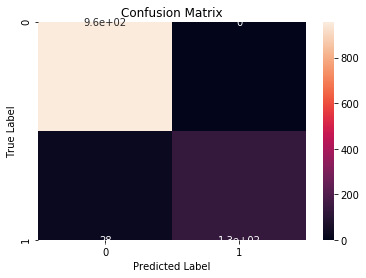

In [37]:
## Q6. Evaluate the performance of your model using confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred),"\nAccuracy",accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
confusion_matrix(y_test,y_pred)

### The Random Forest Classifier gives an accuracy of 0.97. High value f1 score is also obtained from the model. 0 hams were predicted as spam and 28 spams were predicted incorrectly as ham